In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.17058072],
       [2.9404084 ]])

In [4]:
X_new = np.array([[0], [2]])

In [5]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [6]:
y_predict = X_new_b.dot(theta_best)

In [7]:
y_predict

array([[ 4.17058072],
       [10.05139753]])

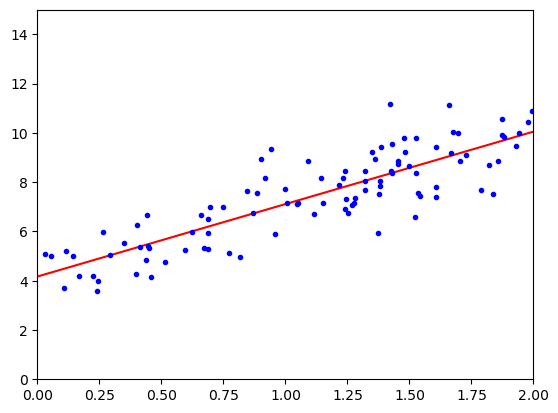

In [9]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.17058072]), array([[2.9404084]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.17058072],
       [10.05139753]])

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients

In [15]:
theta

array([[4.17058072],
       [2.9404084 ]])

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [18]:
theta

array([[4.13412011],
       [2.8997244 ]])

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, learning_rate='constant')
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=50, penalty=None)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.27989883]), array([3.06151153]))

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [23]:
X_poly = poly_features.fit_transform(X)

In [24]:
X[0]

array([0.01006271])

In [25]:
X_poly[0]

array([0.01006271, 0.00010126])

In [26]:
lin_reg = LinearRegression()

In [27]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [28]:
lin_reg.intercept_, lin_reg.coef_

(array([1.90992065]), array([[0.97291751, 0.50431309]]))

In [33]:
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.title("Learning Curves")
    plt.show()

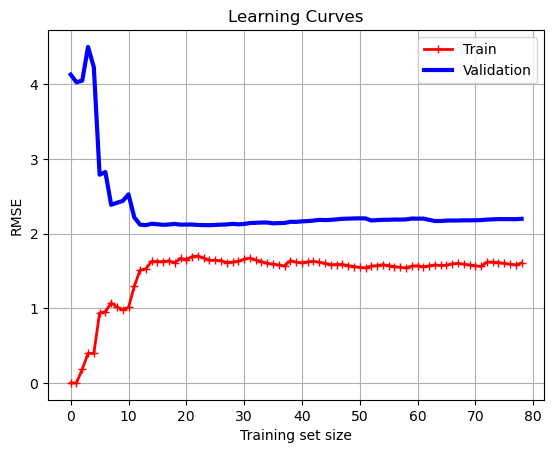

In [34]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

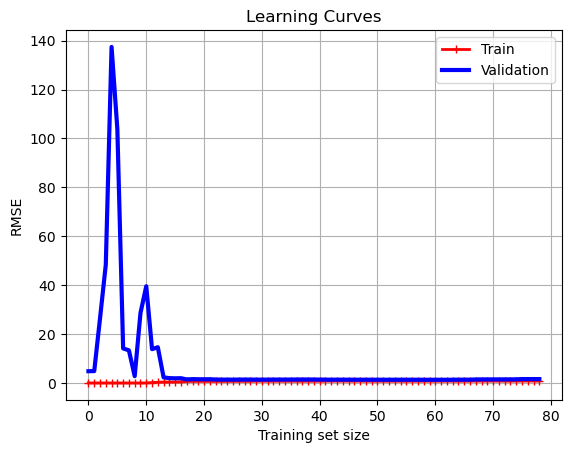

In [35]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

In [36]:
from sklearn.linear_model import Ridge


In [37]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [38]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [39]:
ridge_reg.predict([[1.5]])

array([[4.65303464]])

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [43]:
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y))


continuous
